#### Which Machine Learning Models are Sensitive to Outliers ?
1. Naive Bayes Classifier ------- Not Sensitive to Outliers
2. SVM ------- Not be sensitive
3. Linear Regression ------- Sensitive to Outliers
4. Logistic Regression ------- Sensitive to Outliers
5. Decision Trees Regressor or Classifier ------- Not Sensitive To Outliers
6. Ensemble(RF,XGboost,GB) ------- Not Sensitive To Outliers
7. KNN ------- Not Sensitive to Outliers
8. Kmeans ------- Sensitive to Outliers
9. Hierarichal ------- Sensitive to Outliers
10. PCA ------- Sensitive to Outliers
11. Neural Networks ------- Sensitive to Outliers

In [2]:
import pandas as pd
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df['Age'].isnull().sum()

177

In [7]:
import seaborn as sns

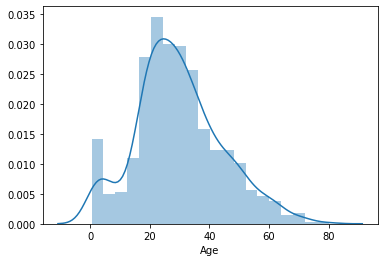

In [8]:
sns.distplot(df['Age'].dropna())

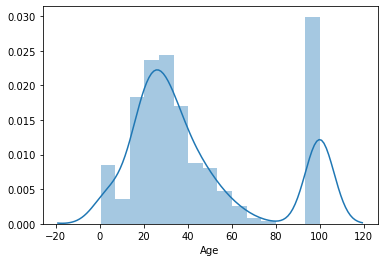

In [9]:
sns.distplot(df['Age'].fillna(100))

Text(0, 0.5, 'Number of passengers')

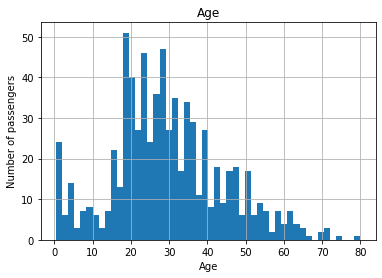

In [12]:
##Gaussian Distributed
figure = df.Age.hist(bins = 50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('Number of passengers')

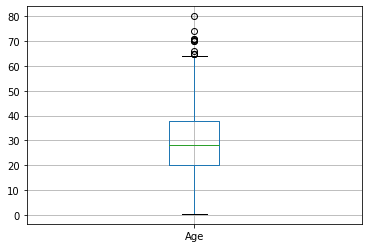

In [13]:
figure = df.boxplot(column = 'Age')

In [14]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [20]:
#### Assuming age follows a gaussian distribution we will calculate the boundries which differentiate the outliers
upper_boundary = df['Age'].mean()+3*df['Age'].std()
lower_boundary = df['Age'].mean()-3*df['Age'].std()
print(upper_boundary)
print(lower_boundary)

73.27860964406095
-13.88037434994331


In [22]:
### Lets compute the interQuantile range (IQR)
IQR = df['Age'].quantile(0.75) - df['Age'].quantile(0.25)
print(IQR)

17.875


In [28]:
lower_bridge = df['Age'].quantile(0.25) - (IQR*1.5)
upper_bridge = df['Age'].quantile(0.75) + (IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-6.6875
64.8125


In [29]:
### Extreme Outliers
lower_bridge_ex = df['Age'].quantile(0.25) - (IQR*3)
upper_bridge_ex = df['Age'].quantile(0.75) + (IQR*3)
print(lower_bridge_ex)
print(upper_bridge_ex)

-33.5
91.625


#### Features are Skewed
If features are skewed then we'll opt for computing IQR 

Text(0, 0.5, 'Number')

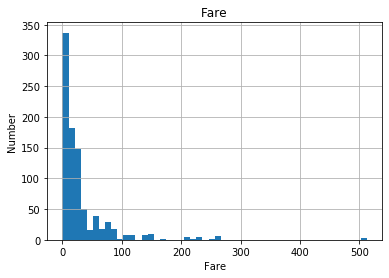

In [32]:
##Gaussian Distributed
figure = df.Fare.hist(bins = 50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('Number')

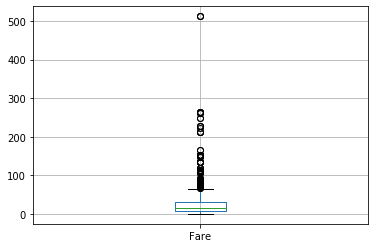

In [33]:
figure = df.boxplot(column = 'Fare')

In [34]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [35]:
### Lets compute the interQuantile range (IQR)
IQR = df['Fare'].quantile(0.75) - df['Fare'].quantile(0.25)
print(IQR)

23.0896


In [36]:
lower_bridge = df['Fare'].quantile(0.25) - (IQR*1.5)
upper_bridge = df['Fare'].quantile(0.75) + (IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-26.724
65.6344


In [37]:
lower_bridge3 = df['Fare'].quantile(0.25) - (IQR*3)
upper_bridge3 = df['Fare'].quantile(0.75) + (IQR*3)
print(lower_bridge3)
print(upper_bridge3)

-61.358399999999996
100.2688


In [40]:
data = df.copy()

In [42]:
data.loc[data['Age']>=73,'Age'] = 73

In [43]:
data.loc[data['Fare']>=100,'Fare'] = 100

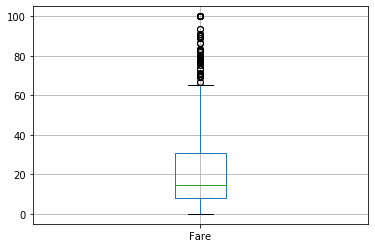

In [44]:
data.boxplot(column = 'Fare')

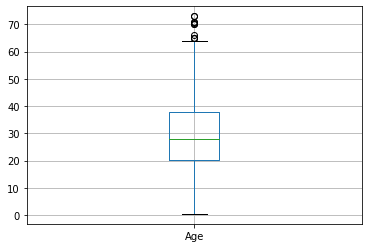

In [45]:
data.boxplot(column = 'Age')

Text(0, 0.5, 'Number')

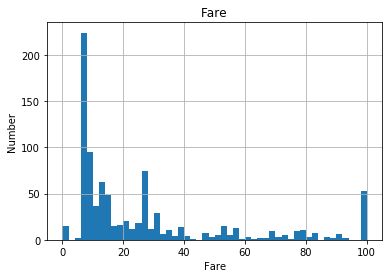

In [46]:
figure = data.Fare.hist(bins = 50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('Number')

Text(0, 0.5, 'Number')

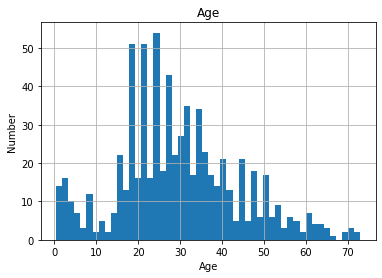

In [47]:
figure = data.Age.hist(bins = 50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('Number')